# Assignment 4

In [372]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Chi-Squared distribution 

Will generate [Chi-Squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) with the parameter `k=2`, calculate the theoretical mean(`mean = k`) and variance(`varience = 2*k`):

In [373]:
chi2_k = 2
chi2_rv = sts.chi2(k)

chi2_mean = k;
chi2_varience = 2 * k;

Now let's take 1000 samples from the distribution:

In [345]:
samples_count = 1000
chi2_samples = chi2_rv.rvs(samples_count)

Plot the theoretical PDF and the sample histagram:

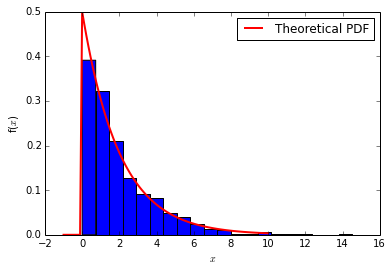

In [363]:
x = np.linspace(-1,10,100)

hist_plot = plt.hist(chi2_samples, bins=20,normed=True)
plt.ylabel('f($x$)')
plt.xlabel('$x$')

pdf = chi2_rv.pdf(x)
pdf_plot = plt.plot(x, pdf, label='Theoretical PDF')
plt.setp(pdf_plot, linewidth=2, color='r')
plt.legend()

## Central limit theorem

Let's first implement a function which returns a number(`count`) of sample means from a given distribution and a given parameter n:

In [364]:
def mean_rvs(rv, n, count):
    return map(lambda i: rv.rvs(n).mean(), range(0, count))

Now let's make 2 functions for plotting a histogram and normal distribution PDF:

In [365]:
def plot_sample_means(x, label):
    plt.hist(x, bins=30, normed=True, label=label)
    plt.ylabel('f($x$)')
    plt.xlabel('$x$')
    plt.legend()
    
def plot_norm_pdf(mean, sandart_deviation, label):
    norm_rv = sts.norm(mean, sandart_deviation)
    pdf_plot = plt.plot(x, norm_rv.pdf(x), label=label)
    plt.setp(pdf_plot, linewidth=2, color='r')
    plt.legend()
    

The following function generates `count` sample means from the original Chi-Squared distribution for a given parameter `n` and plots the sample histogram and theoretical PDF:

In [366]:
def plot_histogram_and_pdf(n, count):
    chi2_means = mean_rvs(chi2_rv, n, count)
    
    plot_sample_means(chi2_means, 'Sample means')

    pdf_standard_deviation = math.sqrt(float(chi2_varience) / n)
    plot_norm_pdf(chi2_mean, pdf_standard_deviation, 'Theoretical PDF')
    

Now let's take 1000 sample means for `n=2` visualize a histogram and theoretical PDF:

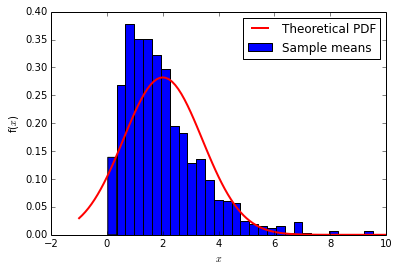

In [367]:
plot_histogram_and_pdf(2, 1000)

The same for `n = 10`:

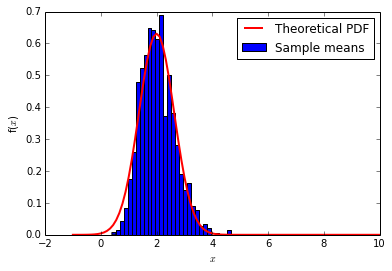

In [368]:
plot_histogram_and_pdf(10, 1000)

Now `n = 50`:

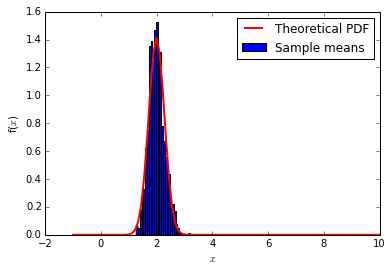

In [371]:
plot_histogram_and_pdf(50, 1000)

## Conclusion

The more we increase the `n` parameter for calculating smaple means the more it's the disribution converges to the Normal one no matter what the original disribution is.